<a href="https://colab.research.google.com/github/vveiiga/pos/blob/master/Trabalho_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Número de Retweets e favoritos por candidatos**

> **ALUNO:** *Vítor Passos da Costa Veiga*
**MATRÍCULA:** *2118446*


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
import datetime
import numpy as np
import math
from io import StringIO
import seaborn as sns
from datetime import date,datetime,timedelta

In [2]:
bolsonaro = json.load(open('/content/sample_data/jairbolsonaro.json', 'r'))

In [3]:
lula = json.load(open('/content/sample_data/LulaOficial.json', 'r'))

In [4]:
print(json.dumps(bolsonaro[0],indent=3))

{
   "created_at": "Thu Apr 01 02:59:50 +0000 2010",
   "id": 11402700435,
   "id_str": "11402700435",
   "full_text": "EM \"DITADURA\" SEM PARED\u00c3O, AT\u00c9 CHICO ALENCAR \u00c9 VALENT\u00c3O. Mostrem ao povo as marcas da tortura. Vcs est\u00e3o d bolso cheio do Bolsa-Ditadura.",
   "truncated": false,
   "display_text_range": [
      0,
      137
   ],
   "entities": {
      "hashtags": [],
      "symbols": [],
      "user_mentions": [],
      "urls": []
   },
   "source": "<a href=\"https://about.twitter.com/products/tweetdeck\" rel=\"nofollow\">TweetDeck</a>",
   "in_reply_to_status_id": null,
   "in_reply_to_status_id_str": null,
   "in_reply_to_user_id": null,
   "in_reply_to_user_id_str": null,
   "in_reply_to_screen_name": null,
   "user": {
      "id": 128372940,
      "id_str": "128372940",
      "name": "Jair M. Bolsonaro",
      "screen_name": "jairbolsonaro",
      "location": "Bras\u00edlia, Brasil",
      "description": "Capit\u00e3o do Ex\u00e9rcito Brasileiro, ele

In [5]:
df_bolsonaro = pd.DataFrame(bolsonaro)  
df_bolsonaro.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Thu Apr 01 02:59:50 +0000 2010,11402700435,11402700435,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,None,...,15,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Jan 10 11:02:23 +0000 2019,1083318129135112192,1083318129135112192,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",False,"[0, 90]","{'hashtags': [{'text': 'tbt', 'indices': [12, ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,31618,False,False,pt,"{'media': [{'id': 1083318121841262592, 'id_str...",False,NaN,NaN,NaN,NaN
2,Fri Jul 19 02:04:16 +0000 2019,1152036400138579968,1152036400138579968,- Para descontrair. Proibido queimar ovo. (Kkk...,False,"[0, 48]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,46637,False,False,pt,"{'media': [{'id': 1152036204247953408, 'id_str...",False,NaN,NaN,NaN,NaN
3,Tue Oct 09 02:52:56 +0000 2018,1049492883328380928,1049492883328380928,Trecho de entrevista ao vivo para o Jornal Nac...,False,"[0, 65]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,56322,False,False,pt,"{'media': [{'id': 1049489244387983360, 'id_str...",False,NaN,NaN,NaN,NaN
4,Wed Aug 23 15:12:48 +0000 2017,900375277557215232,900375277557215232,Querem criar o fundão bilionário na Reforma Po...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,7147,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
###Extrair informação de ano
df_bolsonaro['Ano'] = df_bolsonaro['created_at'].apply(lambda x: x.split(' ')[5])
print(df_bolsonaro['Ano'])

0       2010
1       2019
2       2019
3       2018
4       2017
        ... 
6789    2019
6790    2016
6791    2019
6792    2019
6793    2014
Name: Ano, Length: 6794, dtype: object


In [7]:
#criação da info de mes
df_bolsonaro['Mes'] = df_bolsonaro['created_at'].apply(lambda x: x.split(' ')[1])

In [8]:
###Trabalhando com a informação agrupada
favoritos_ano_bolsonaro = df_bolsonaro.groupby('Ano',)[['favorite_count']].sum().sort_values(by='favorite_count',ascending= False).reset_index()

favoritos_mes_bolsonaro = df_bolsonaro.groupby('Mes',)[['favorite_count']].sum().sort_values(by='favorite_count',ascending= False).reset_index()

retweets_ano_bolsonaro = df_bolsonaro.groupby('Ano',)[['retweet_count']].sum().sort_values(by='retweet_count',ascending= False).reset_index()

retweets_mes_bolsonaro = df_bolsonaro.groupby('Mes',)[['retweet_count']].sum().sort_values(by='retweet_count',ascending= False).reset_index()

No handles with labels found to put in legend.


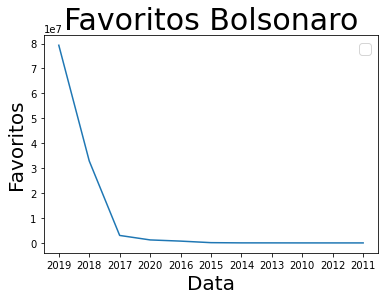

In [9]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
x = favoritos_ano_bolsonaro['Ano']
y = favoritos_ano_bolsonaro['favorite_count']
plt.plot(x,y)
plt.legend(fontsize=15)
plt.xlabel('Data',fontsize=20)
plt.ylabel('Favoritos',fontsize=20)
plt.title('Favoritos Bolsonaro',fontsize=30)
plt.show()


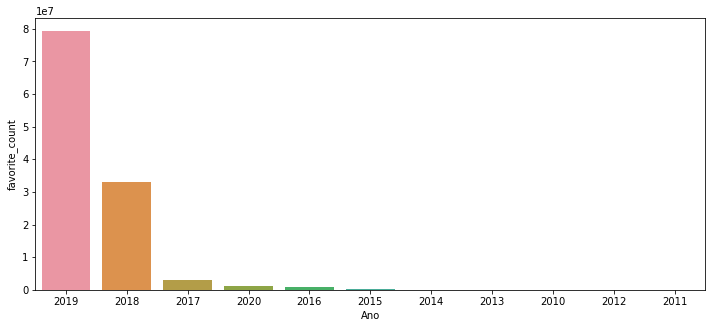

In [10]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
plt.figure(figsize = (12,5))
sns.barplot(x= 'Ano', y = 'favorite_count', data = favoritos_ano_bolsonaro.sort_values(by = 'favorite_count', ascending = False))

No handles with labels found to put in legend.


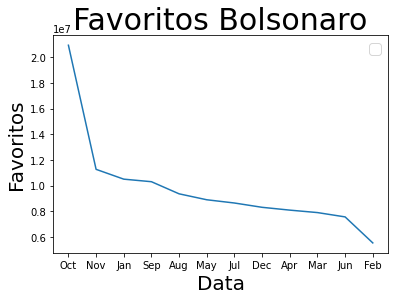

In [11]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
x = favoritos_mes_bolsonaro['Mes']
y = favoritos_mes_bolsonaro['favorite_count']
plt.plot(x,y)
plt.legend(fontsize=15)
plt.xlabel('Data',fontsize=20)
plt.ylabel('Favoritos',fontsize=20)
plt.title('Favoritos Bolsonaro',fontsize=30)
plt.show()

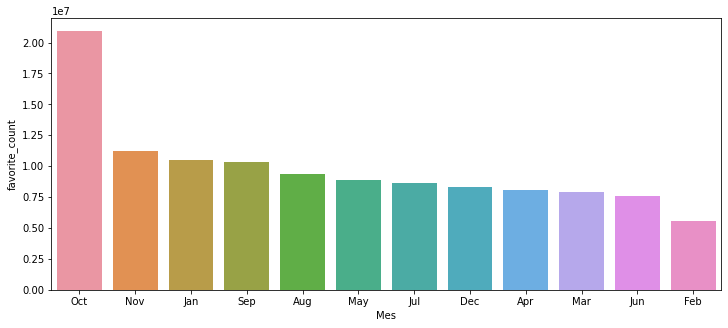

In [12]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
plt.figure(figsize = (12,5))
sns.barplot(x= 'Mes', y = 'favorite_count', data = favoritos_mes_bolsonaro.sort_values(by = 'favorite_count', ascending = False))

No handles with labels found to put in legend.


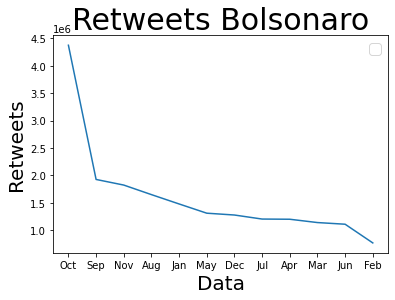

In [13]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
x = retweets_mes_bolsonaro['Mes']
y = retweets_mes_bolsonaro['retweet_count']
plt.plot(x,y)
plt.legend(fontsize=15)
plt.xlabel('Data',fontsize=20)
plt.ylabel('Retweets',fontsize=20)
plt.title('Retweets Bolsonaro',fontsize=30)
plt.show()

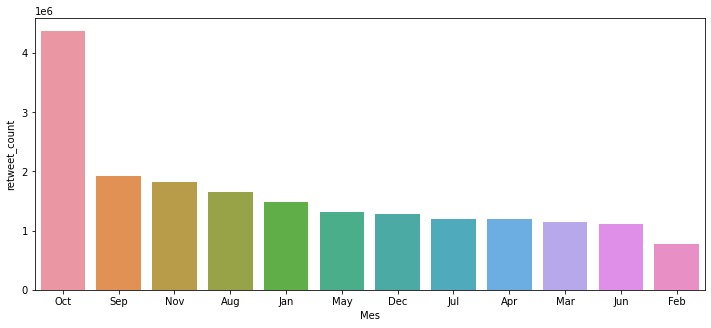

In [14]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
plt.figure(figsize = (12,5))
sns.barplot(x= 'Mes', y = 'retweet_count', data = retweets_mes_bolsonaro.sort_values(by = 'retweet_count', ascending = False))

No handles with labels found to put in legend.


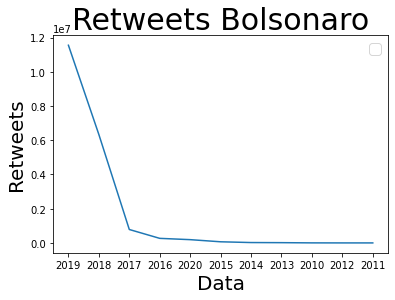

In [15]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
x = retweets_ano_bolsonaro['Ano']
y = retweets_ano_bolsonaro['retweet_count']
plt.plot(x,y)
plt.legend(fontsize=15)
plt.xlabel('Data',fontsize=20)
plt.ylabel('Retweets',fontsize=20)
plt.title('Retweets Bolsonaro',fontsize=30)
plt.show()

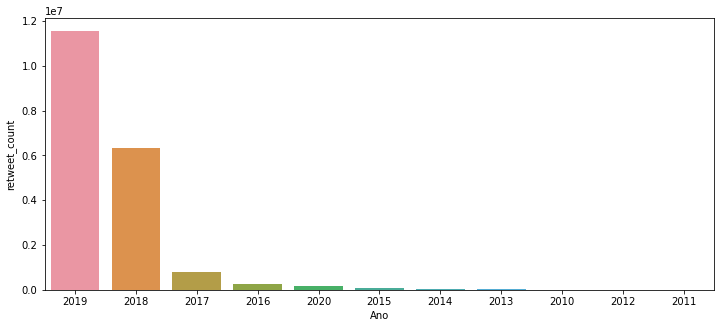

In [16]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'Ano', y = 'retweet_count', data = retweets_ano_bolsonaro.sort_values(by = 'retweet_count', ascending = False))

In [17]:
df_lula = pd.DataFrame(lula)

In [18]:
df_lula.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Fri Aug 17 16:23:04 +0000 2018,1030490201460801541,1030490201460801541,"""O presidente Lula vai dar um passeio nessa el...",False,"[0, 212]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,None,...,347,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Sep 16 01:53:02 +0000 2014,511694215735422976,511694215735422976,@dilmabr afirma que aqueles que querem acabar ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,9,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue Aug 08 23:23:49 +0000 2017,895063025996242944,895063025996242944,O PT deu cidadania para as mulheres fazerem po...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,203,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed Oct 18 11:24:23 +0000 2017,920611514071076865,920611514071076865,Continuo sendo o lulinha paz e a amor. A gente...,False,"[0, 108]","{'hashtags': [{'text': 'LulanoRadio', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,None,...,153,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Apr 24 22:24:18 +0000 2017,856634932764037120,856634932764037120,"Olhando as últimas pesquisas, vemos que a únic...",False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,None,...,168,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_lula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14961 entries, 0 to 14960
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 14961 non-null  object 
 1   id                         14961 non-null  int64  
 2   id_str                     14961 non-null  object 
 3   full_text                  14961 non-null  object 
 4   truncated                  14961 non-null  bool   
 5   display_text_range         14961 non-null  object 
 6   entities                   14961 non-null  object 
 7   source                     14961 non-null  object 
 8   in_reply_to_status_id      321 non-null    float64
 9   in_reply_to_status_id_str  321 non-null    object 
 10  in_reply_to_user_id        388 non-null    float64
 11  in_reply_to_user_id_str    388 non-null    object 
 12  in_reply_to_screen_name    388 non-null    object 
 13  user                       14961 non-null  obj

In [20]:
#criação de novas colunas
df_lula['Ano'] = df_lula['created_at'].apply(lambda x: x.split(' ')[5])
df_lula['Mes'] = df_lula['created_at'].apply(lambda x: x.split(' ')[1])

In [21]:
###criação dos agrupamentos de mes e ano para criação dos gráficos

retweets_mes_lula = df_lula.groupby('Mes',)[['retweet_count']].sum().sort_values(by='retweet_count',ascending= False).reset_index()

retweets_ano_lula = df_lula.groupby('Ano',)[['retweet_count']].sum().sort_values(by='retweet_count',ascending= False).reset_index()

favoritos_mes_lula = df_lula.groupby('Mes',)[['favorite_count']].sum().sort_values(by='favorite_count',ascending= False).reset_index()

favoritos_ano_lula = df_lula.groupby('Ano',)[['favorite_count']].sum().sort_values(by='favorite_count',ascending= False).reset_index()


No handles with labels found to put in legend.


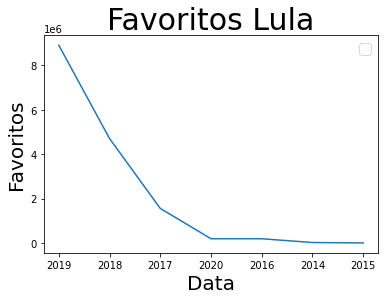

In [22]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
x = favoritos_ano_lula['Ano']
y = favoritos_ano_lula['favorite_count']
plt.plot(x,y)
plt.legend(fontsize=15)
plt.xlabel('Data',fontsize=20)
plt.ylabel('Favoritos',fontsize=20)
plt.title('Favoritos Lula',fontsize=30)
plt.show()


No handles with labels found to put in legend.


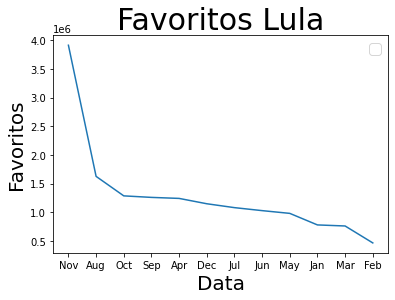

In [23]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
x = favoritos_mes_lula['Mes']
y = favoritos_mes_lula['favorite_count']
plt.plot(x,y)
plt.legend(fontsize=15)
plt.xlabel('Data',fontsize=20)
plt.ylabel('Favoritos',fontsize=20)
plt.title('Favoritos Lula',fontsize=30)
plt.show()

No handles with labels found to put in legend.


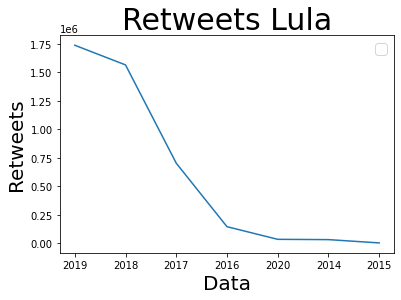

In [24]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
x = retweets_ano_lula['Ano']
y = retweets_ano_lula['retweet_count']
plt.plot(x,y)
plt.legend(fontsize=15)
plt.xlabel('Data',fontsize=20)
plt.ylabel('Retweets',fontsize=20)
plt.title('Retweets Lula',fontsize=30)
plt.show()

No handles with labels found to put in legend.


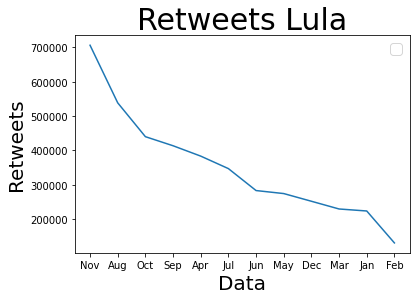

In [25]:
###Criação de Grafico nao sei o motivo de arredondar nas labels
x = retweets_mes_lula['Mes']
y = retweets_mes_lula['retweet_count']
plt.plot(x,y)
plt.legend(fontsize=15)
plt.xlabel('Data',fontsize=20)
plt.ylabel('Retweets',fontsize=20)
plt.title('Retweets Lula',fontsize=30)
plt.show()

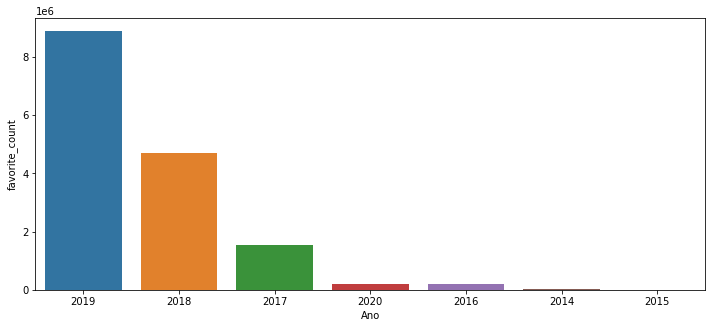

In [26]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'Ano', y = 'favorite_count', data = favoritos_ano_lula.sort_values(by = 'favorite_count', ascending = False))

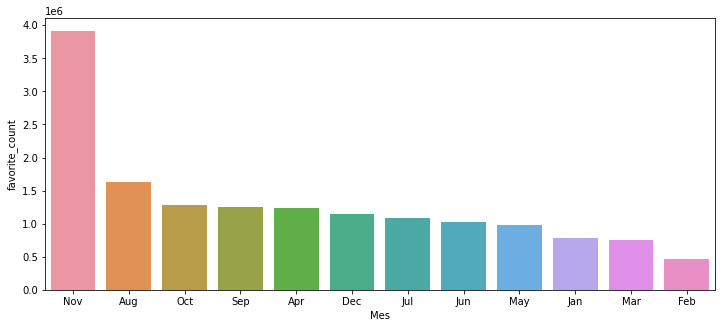

In [27]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'Mes', y = 'favorite_count', data = favoritos_mes_lula.sort_values(by = 'favorite_count', ascending = False))

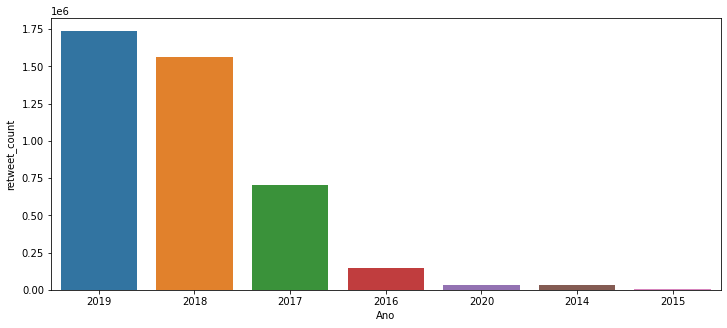

In [28]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'Ano', y = 'retweet_count', data = retweets_ano_lula.sort_values(by = 'retweet_count', ascending = False))

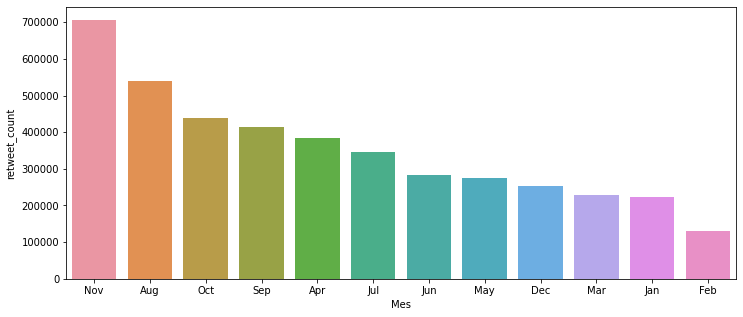

In [29]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'Mes', y = 'retweet_count', data = retweets_mes_lula.sort_values(by = 'retweet_count', ascending = False))